# Handwritten Digits Classification using Neural Network

Using only Python and Numpy.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('dataset/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = np.array(train, dtype=np.float64)
train.shape

(42000, 785)

In [4]:
train = train.T
Y = train[0]
X = train[1:]

print(X.shape, Y.shape)

(784, 42000) (42000,)


In [5]:
Y.reshape(Y.shape[0], 1)
Y.shape

(42000,)

In [6]:
nx, m = X.shape

def initialisation():
    # First hidden layer has 16 neurons
    W1 = np.float64(np.random.rand(16, nx))
    b1 = np.float64(np.random.rand(16, 1))
    
    # Second Hidden layer has 16 neurons
    W2 = np.float64(np.random.rand(16, 16))
    b2 = np.float64(np.random.rand(16, 1))
    
    # Output layer has 10 neurons
    W3 = np.float64(np.random.rand(10, 16))
    b3 = np.float64(np.random.rand(10, 1))
    
    return W1, b1, W2, b2, W3, b3

In [7]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

In [8]:
print(Y.max(), Y.min())
Y[:20]

9.0 0.0


array([1., 0., 1., 4., 0., 0., 7., 3., 5., 3., 8., 9., 1., 3., 3., 1., 2.,
       0., 7., 5.])

In [9]:
def mean_square_loss(predictions, Y):
    for i in range(len(Y)):
        predictions[int(Y[i]), i] -= 1
    
    predictions = predictions * predictions
    
    return 0.5 * predictions

def mean_square_derivative(predictions, Y):
    for i in range(len(Y)):
        predictions[int(Y[i]), i] = 1 - predictions[int(Y[i]), i]
    
    return predictions

In [10]:
def propagation(A0, W1, b1, W2, b2, W3, b3, Y):
    ## FORWARD PROPAGATION
    # Initial to First
    Z1 = np.dot(W1, A0) + b1
    A1 = sigmoid(Z1)
    
    # First to Second
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Second to Final
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    ## BACKWARD PROPAGATION
    # Final to Second
    dZ3 = mean_square_derivative(A3, Y) * sigmoid_derivative(Z3)
    dW3 = np.dot(dZ3, A2.T)
    db3 = np.sum(dZ3, axis=1).reshape(10, 1)
    
    # Second to First
    dZ2 = np.dot(W3.T, dZ3) * sigmoid_derivative(Z2)
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1).reshape(16, 1)
    
    # First to Initial
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, A0.T)
    db1 = np.sum(dZ1, axis=1).reshape(16, 1)
    
    return A3, dW1, db1, dW2, db2, dW3, db3

In [11]:
def correction(W1, dW1, b1, db1, W2, dW2, b2, db2, W3, dW3, b3, db3, alpha):
    W1 = W1 - (alpha * dW1)
    b1 = b1 - (alpha * db1)
    
    W2 = W2 - (alpha * dW2)
    b2 = b2 - (alpha * db2)
    
    W3 = W3 - (alpha * dW3)
    b3 = b3 - (alpha * db3)
    
    return W1, b1, W2, b2, W3, b3

In [12]:
def accuracy(prediction, Y):
    prediction = np.argmax(prediction, axis=0)
    
    return (np.sum(prediction == Y) / Y.size)

In [13]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = initialisation()
    
    for iteration in range(iterations + 1):
        A3, dW1, db1, dW2, db2, dW3, db3 = propagation(X, W1, b1, W2, b2, W3, b3, Y)
        W1, b1, W2, b2, W3, b3 = correction(W1, dW1, b1, db1, W2, dW2, b2, db2, W3, dW3, b3, db3, alpha)
        
        
        print(f"Iteration {iteration}: {accuracy(A3, Y)}")
    
    return W1, b1, W2, b2, W3, b3, A3

In [14]:
W1, b1, W2, b2, W3, b3, A3 = gradient_descent(X, Y, 0.01, 15)

Iteration 0: 0.0
Iteration 1: 0.09945238095238096
Iteration 2: 0.18980952380952382
Iteration 3: 0.4916190476190476
Iteration 4: 0.8046666666666666
Iteration 5: 1.0


C:\Users\bharg\AppData\Local\Temp\ipykernel_20596\4177611724.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Iteration 6: 1.0
Iteration 7: 1.0
Iteration 8: 1.0
Iteration 9: 1.0
Iteration 10: 1.0
Iteration 11: 1.0
Iteration 12: 1.0
Iteration 13: 1.0
Iteration 14: 1.0
Iteration 15: 1.0


Prediction 2; Actual 2.0
Prediction 7; Actual 7.0
Prediction 2; Actual 2.0
Prediction 7; Actual 7.0
Prediction 5; Actual 5.0
Prediction 1; Actual 1.0
Prediction 6; Actual 6.0
Prediction 0; Actual 0.0
Prediction 7; Actual 7.0
Prediction 6; Actual 6.0


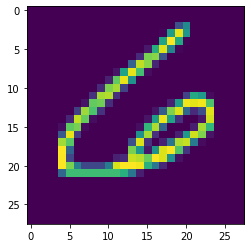

In [15]:
import matplotlib.pyplot as plt

predictions = np.argmax(A3, axis=0)

for i in np.random.randint(0, 42000, 10):
    print(f"Prediction {predictions[i]}; Actual {Y[i]}")
    plt.imshow(X[:, i].reshape((28, 28, 1)))

In [16]:
def make_prediction(A0, W1, b1, W2, b2, W3, b3):
    # Initial to First
    Z1 = np.dot(W1, A0) + b1
    A1 = sigmoid(Z1)
    
    # First to Second
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Second to Final
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    return A3

In [17]:
test = pd.read_csv('dataset/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test = np.array(test).T
test.shape

(784, 28000)

In [19]:
# TESTING
result = make_prediction(test, W1, b1, W2, b2, W3, b3)
result.shape

C:\Users\bharg\AppData\Local\Temp\ipykernel_20596\4177611724.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


(10, 28000)

In [20]:
guesses = np.argmax(result, axis=0)
guesses.shape

(28000,)